In [1]:
# import packeges using in code 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
warnings.filterwarnings('ignore',category=UserWarning)

In [2]:
# read data
data=pd.read_csv("Sales Product Ecommerce.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Customer Shipping Address,City Store,Category,Customer Gender,Customer Age Range,Discount
0,236670,Wired Headphones,16,11.99,8/31/2019 22:21,"359 Spruce St, Seattle, WA 98101",Dallas,Headphones,Male,18-20,"0,18"
1,236671,Bose SoundSport Headphones,9,99.99,8/15/2019 15:11,"492 Ridge St, Dallas, TX 75001",Los Angeles,Headphones,Male,21-25,"0,21"
2,236672,iPhone,8,700,8/6/2019 14:40,"149 7th St, Portland, OR 97035",New York City,Phone,Male,26-30,"0,05"
3,236673,AA Batteries (4-pack),12,3.84,8/29/2019 20:59,"631 2nd St, Los Angeles, CA 90001",San Francisco,Batteries,Female,31-40,"0,08"
4,236674,AA Batteries (4-pack),16,3.84,8/15/2019 19:53,"736 14th St, New York City, NY 10001",Boston,Batteries,Female,41-50,"0,14"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Order ID                   185950 non-null  int64 
 1   Product                    185950 non-null  object
 2   Quantity Ordered           185950 non-null  int64 
 3   Price Each                 185950 non-null  object
 4   Order Date                 185950 non-null  object
 5   Customer Shipping Address  185950 non-null  object
 6   City Store                 185950 non-null  object
 7   Category                   185950 non-null  object
 8   Customer Gender            185950 non-null  object
 9   Customer Age Range         185950 non-null  object
 10  Discount                   185950 non-null  object
dtypes: int64(2), object(9)
memory usage: 15.6+ MB


In [4]:
data.shape

(185950, 11)

In [5]:
data.size

2045450

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Order ID                     0
Product                      0
Quantity Ordered             0
Price Each                   0
Order Date                   0
Customer Shipping Address    0
City Store                   0
Category                     0
Customer Gender              0
Customer Age Range           0
Discount                     0
dtype: int64

In [8]:
data['Price Each'] = pd.to_numeric(data['Price Each'], errors='coerce')
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Order ID                   185950 non-null  int64  
 1   Product                    185950 non-null  object 
 2   Quantity Ordered           185950 non-null  int64  
 3   Price Each                 146668 non-null  float64
 4   Order Date                 185950 non-null  object 
 5   Customer Shipping Address  185950 non-null  object 
 6   City Store                 185950 non-null  object 
 7   Category                   185950 non-null  object 
 8   Customer Gender            185950 non-null  object 
 9   Customer Age Range         185950 non-null  object 
 10  Discount                   185950 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 15.6+ MB


In [9]:
data['Price Each'].min()

2.99

In [10]:
data['Price Each'].max()

1700.0

In [11]:
data.nunique()

Order ID                     178437
Product                          19
Quantity Ordered                 48
Price Each                       17
Order Date                   142395
Customer Shipping Address    140787
City Store                        5
Category                          9
Customer Gender                   2
Customer Age Range                6
Discount                         31
dtype: int64

Text(0.5, 1.0, 'Distribution of Category')

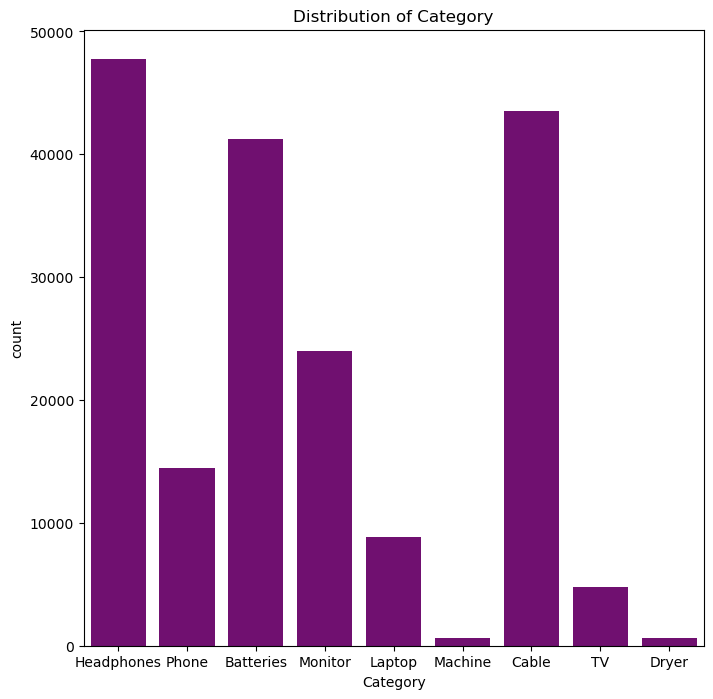

In [12]:
# visulization
plt.figure(figsize=(8,8))
sns.countplot(x="Category" ,data=data , color='purple')
plt.title("Distribution of Category")

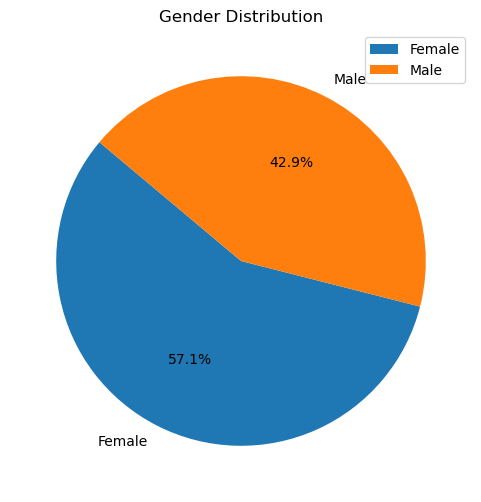

In [13]:
# Plot gender distribution
plt.figure(figsize=(6, 6))
sizes = data['Customer Gender'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution')
plt.legend(loc="upper right")
plt.show()

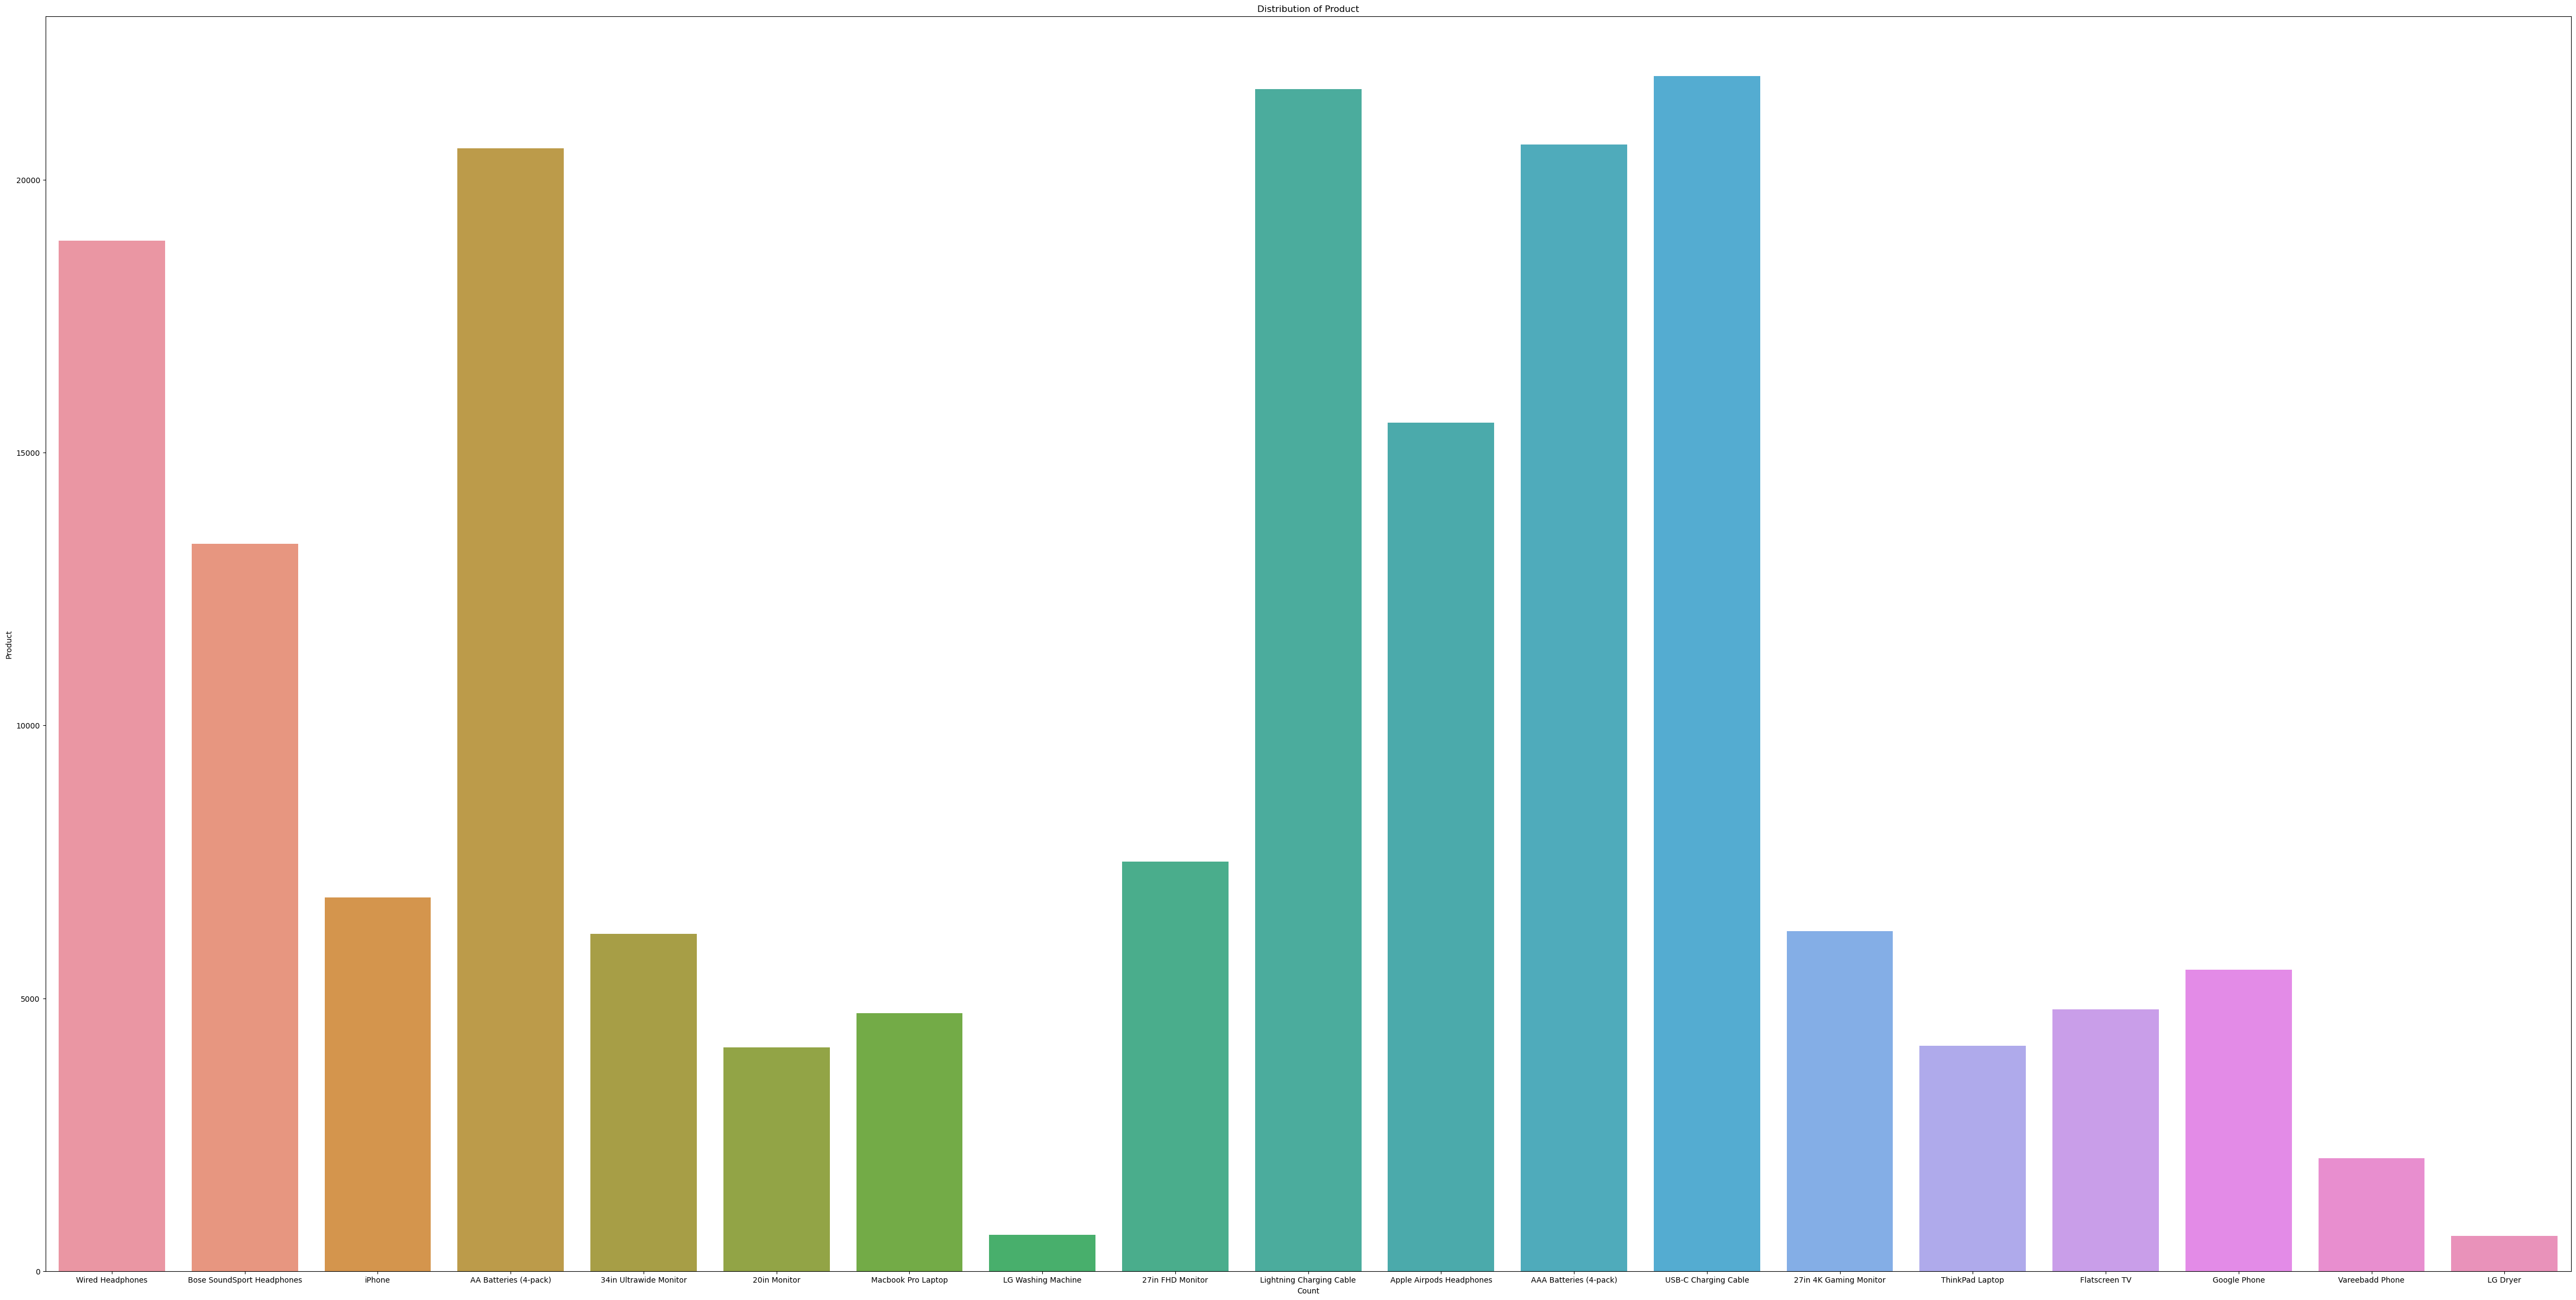

In [14]:
import seaborn as sns
plt.figure(figsize=(60, 30))

# Set the color palette
sns.set_palette("cividis")
sns.countplot(x="Product", data=data)
plt.title("Distribution of Product")
plt.xlabel("Count")
plt.ylabel("Product")
plt.show()
plt.show()

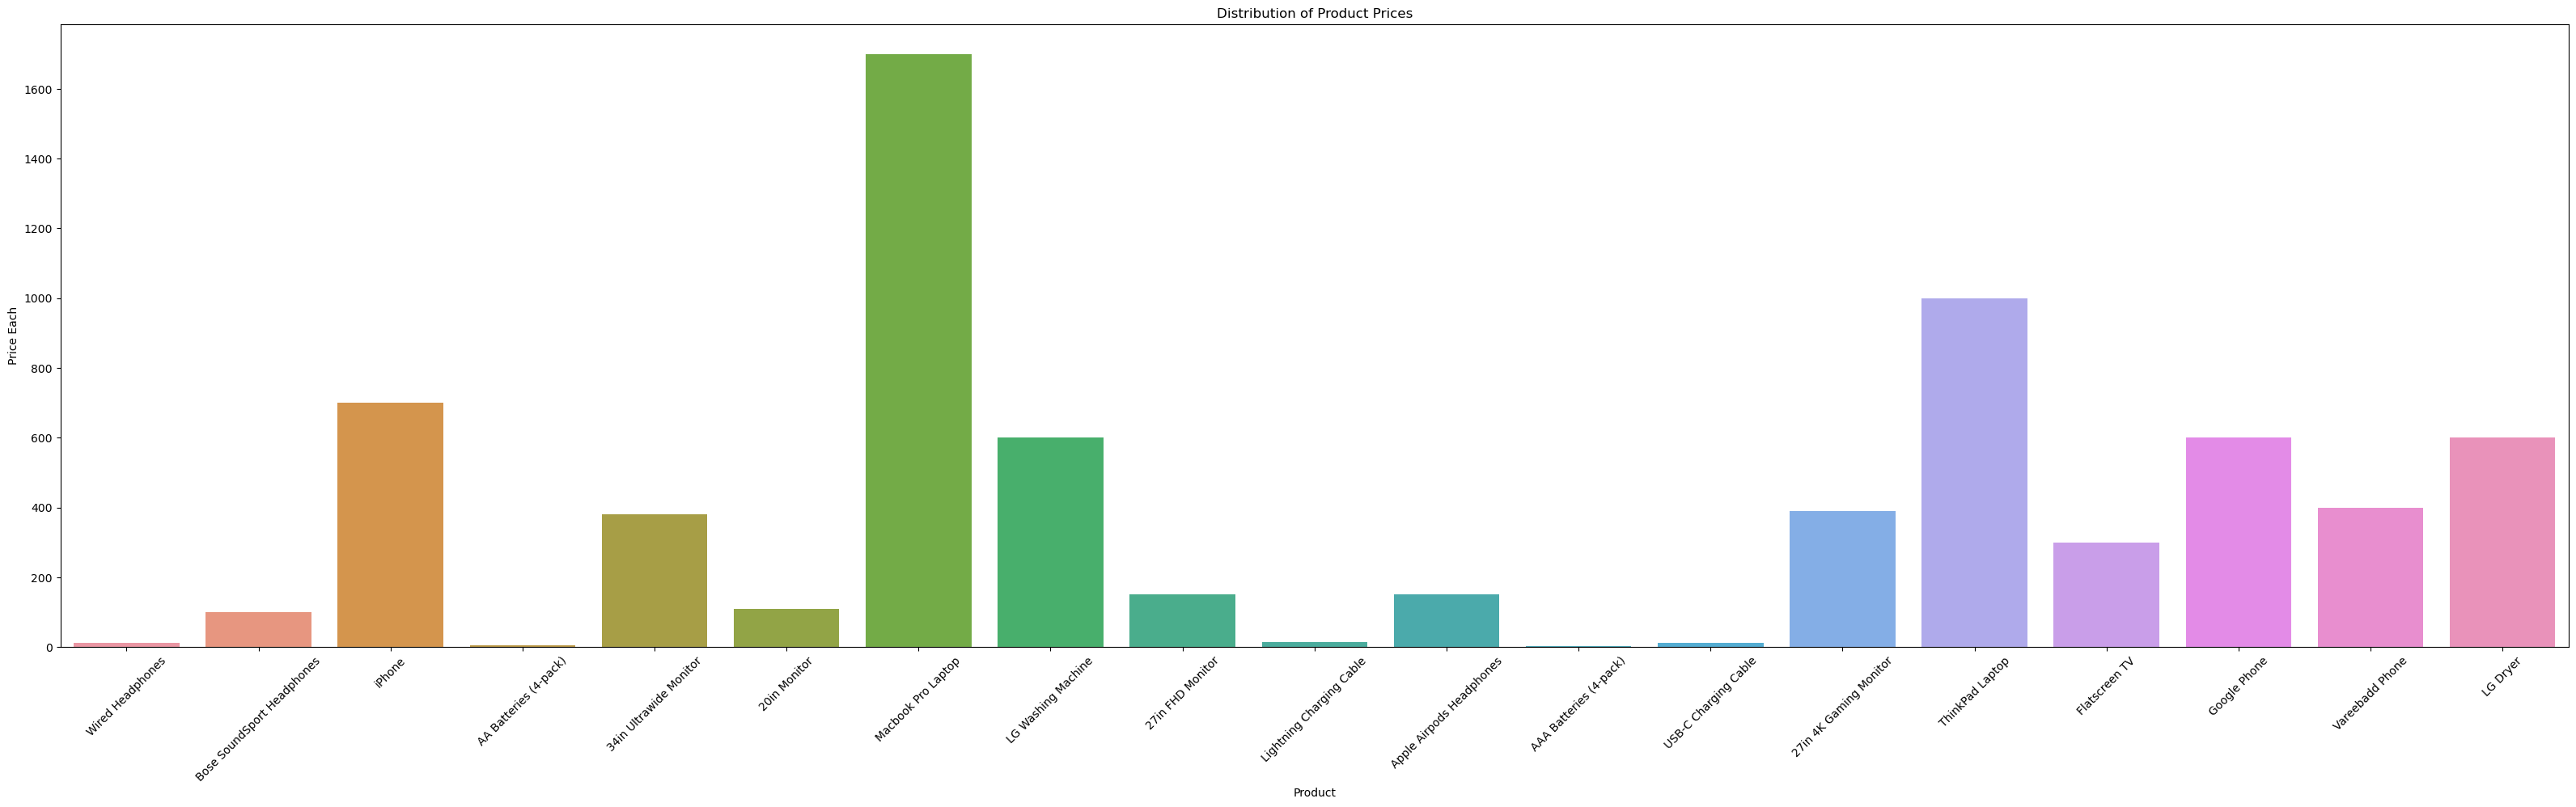

In [15]:
# Set the figure size
plt.figure(figsize=(40, 10))

# Set the color palette
sns.set_palette("cividis")

# Assuming 'data' is your DataFrame
sns.barplot(x='Product', y='Price Each', data=data)
plt.title("Distribution of Product Prices")
plt.xlabel("Product")
plt.ylabel("Price Each")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

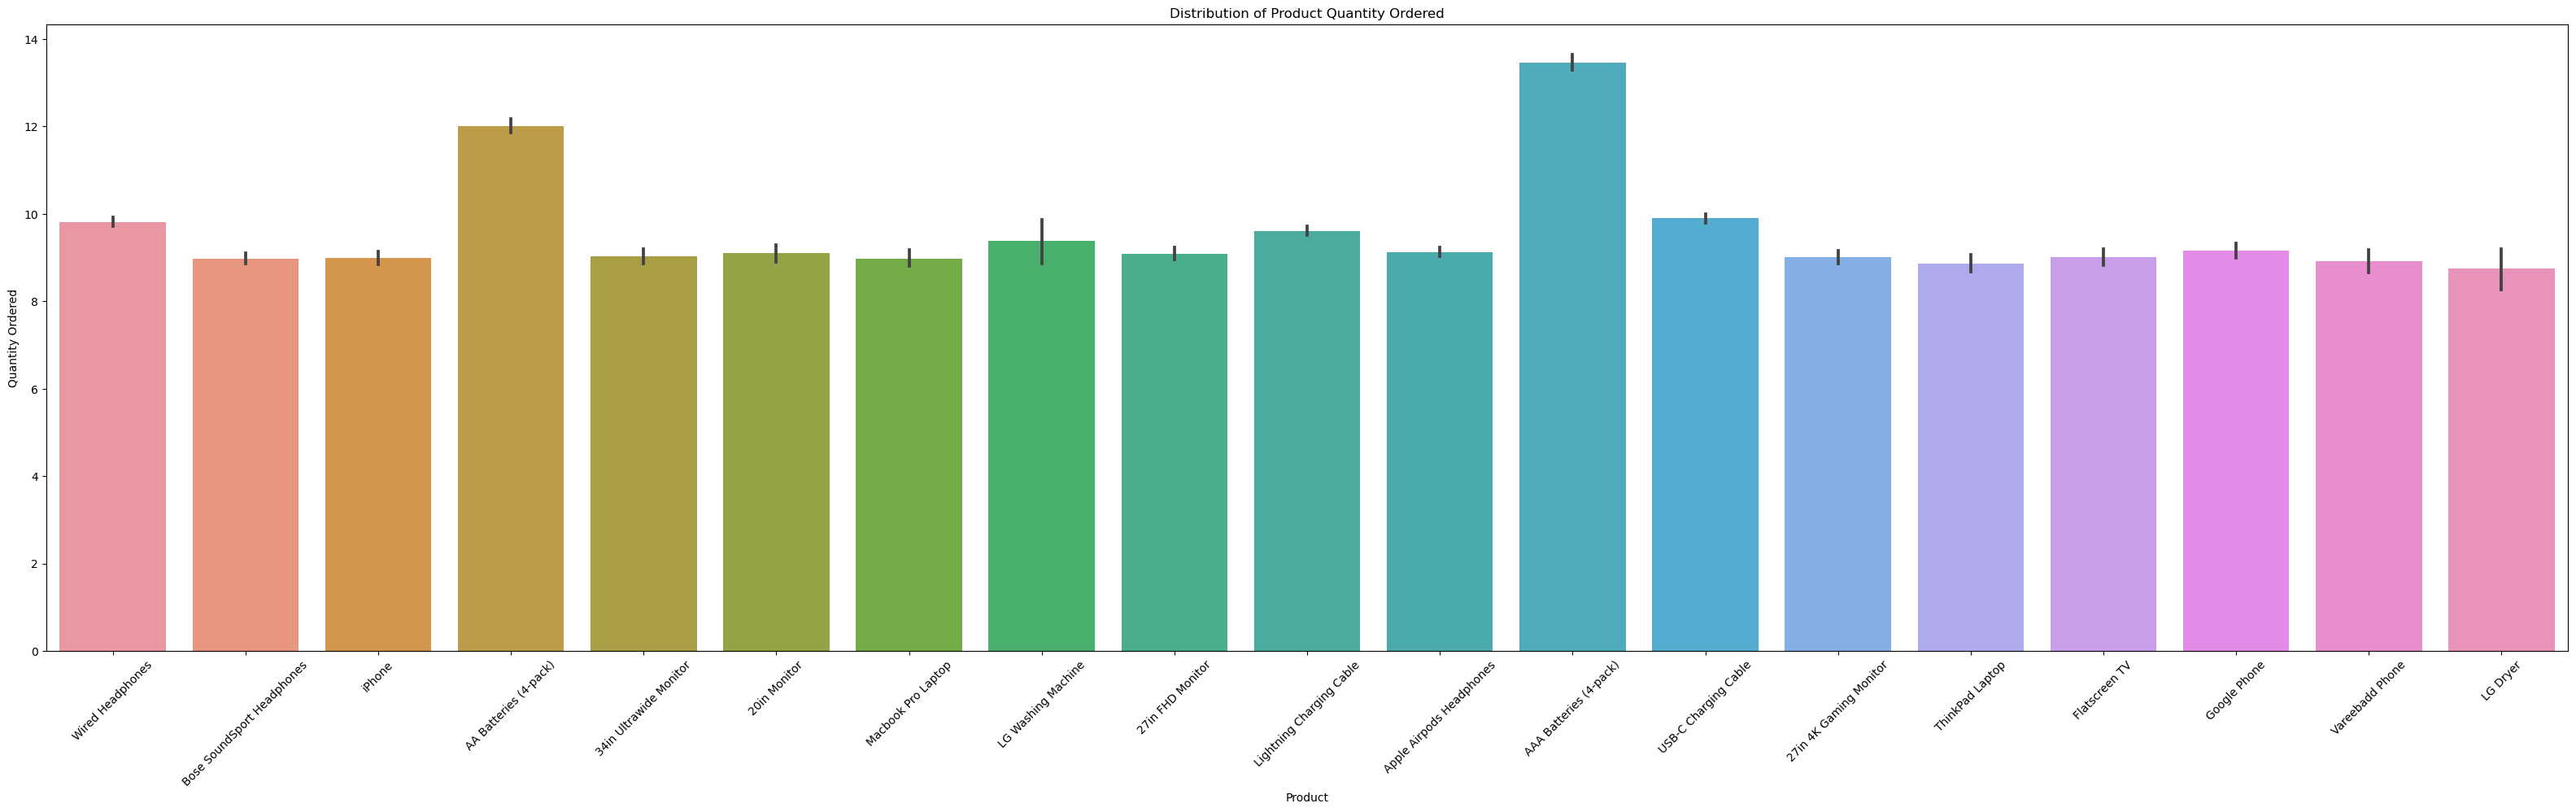

In [16]:
# Set the figure size
plt.figure(figsize=(40, 10))

# Set the color palette
sns.set_palette("cividis")

# Assuming 'data' is your DataFrame
sns.barplot(x='Product', y='Quantity Ordered', data=data)
plt.title("Distribution of Product Quantity Ordered")
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<Figure size 1200x800 with 0 Axes>

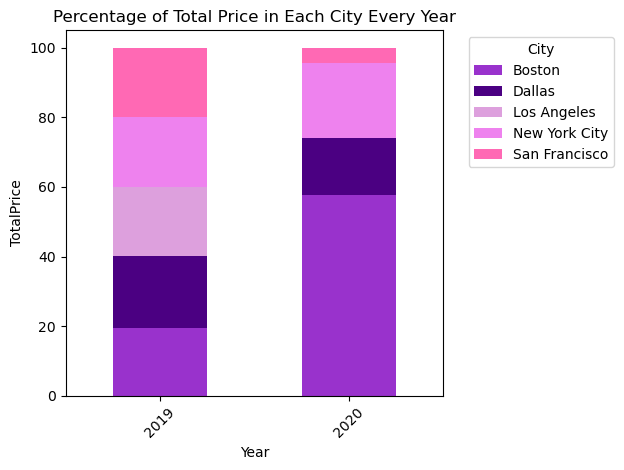

In [17]:
# Convert 'Order Date' column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract just the year from the 'Order Date' column
data['Year'] = data['Order Date'].dt.year

# Calculate total price for each row, replace NaN values in 'Discount' with 0
data['TotalPrice'] = data['Price Each'] * data['Quantity Ordered']

# Group data by 'Year' and 'City Store' and calculate total price
grouped_data = data.groupby(['Year', 'City Store'])['TotalPrice'].sum().reset_index()

# Pivot the table to have 'Year' as rows, 'City Store' as columns, and 'TotalPrice' as values
pivot_table = grouped_data.pivot(index='Year', columns='City Store', values='TotalPrice')

# Calculate the percentage of total price for each city every year
percentage_per_city_every_year = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Define custom colors for the bars
colors = ['darkorchid', 'indigo', 'plum', 'violet', 'hotpink']  # Add more colors as needed

# Plot the results with custom colors
plt.figure(figsize=(12, 8))
percentage_per_city_every_year.plot(kind='bar', stacked=True, color=colors)
plt.title('Percentage of Total Price in Each City Every Year')
plt.xlabel('Year')
plt.ylabel('TotalPrice')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Category
Batteries      1780609.11
Cable          5703903.30
Dryer          3389400.00
Headphones    14313681.38
Laptop        37015733.97
Machine        3746400.00
Monitor       57435295.39
Phone           468300.00
TV               54300.00
Name: TotalPrice, dtype: float64


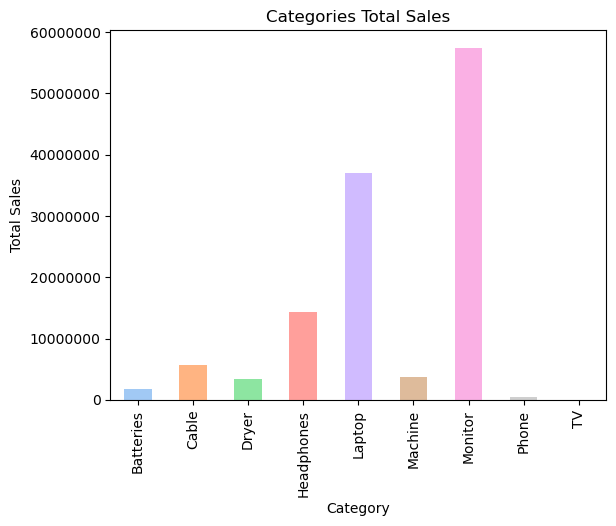

In [18]:
categories_total_sales = data.groupby('Category')['TotalPrice'].sum()
print(categories_total_sales)

# show Total Sales For each Category

grouped_data = data.groupby('Category')['TotalPrice'].sum()

num_shades = len(grouped_data)
colors = sns.color_palette("pastel", num_shades)

grouped_data.plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Categories Total Sales')
# Display actual values on the y-axis
plt.ticklabel_format(style='plain', axis='y')
plt.show()

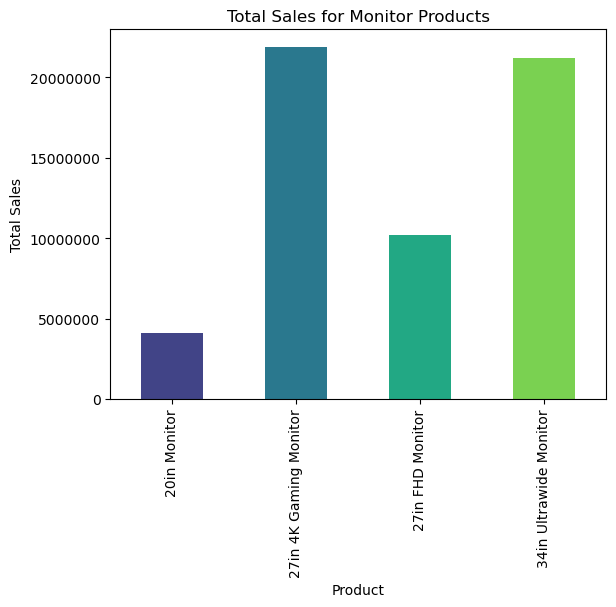

In [19]:
# the total sales for each Monitor product
monitor_products_sales = data[data['Category'] == 'Monitor'].groupby('Product')['TotalPrice'].sum()

# show Total Sales For each Monitor Product
monitor_products_sales.plot(kind='bar', color=sns.color_palette('viridis', len(monitor_products_sales)))

plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales for Monitor Products')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Text(0, 0.5, 'Total\xa0Sales')

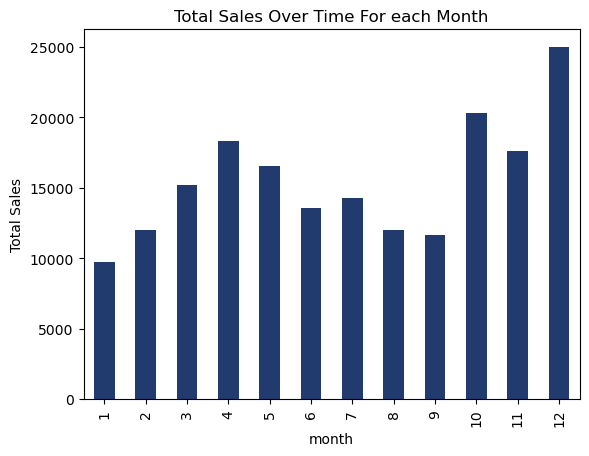

In [20]:
data['month'] = pd.DatetimeIndex(data['Order Date']).month
data.groupby('month')['Quantity Ordered'].count().plot(kind='bar')
plt.title('Total Sales Over Time For each Month')
plt.ylabel('Total Sales')

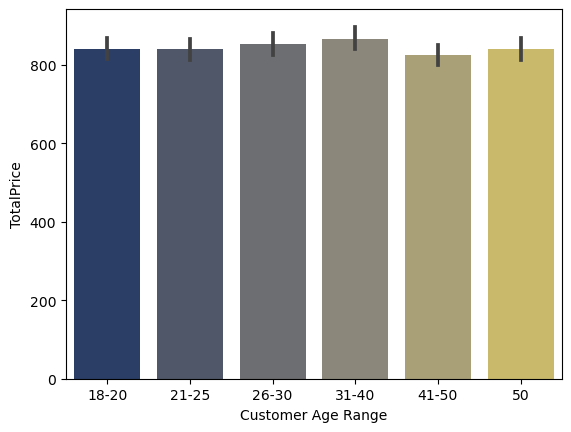

In [21]:
sns.barplot(x='Customer Age Range',y='TotalPrice', data=data)
plt.show()

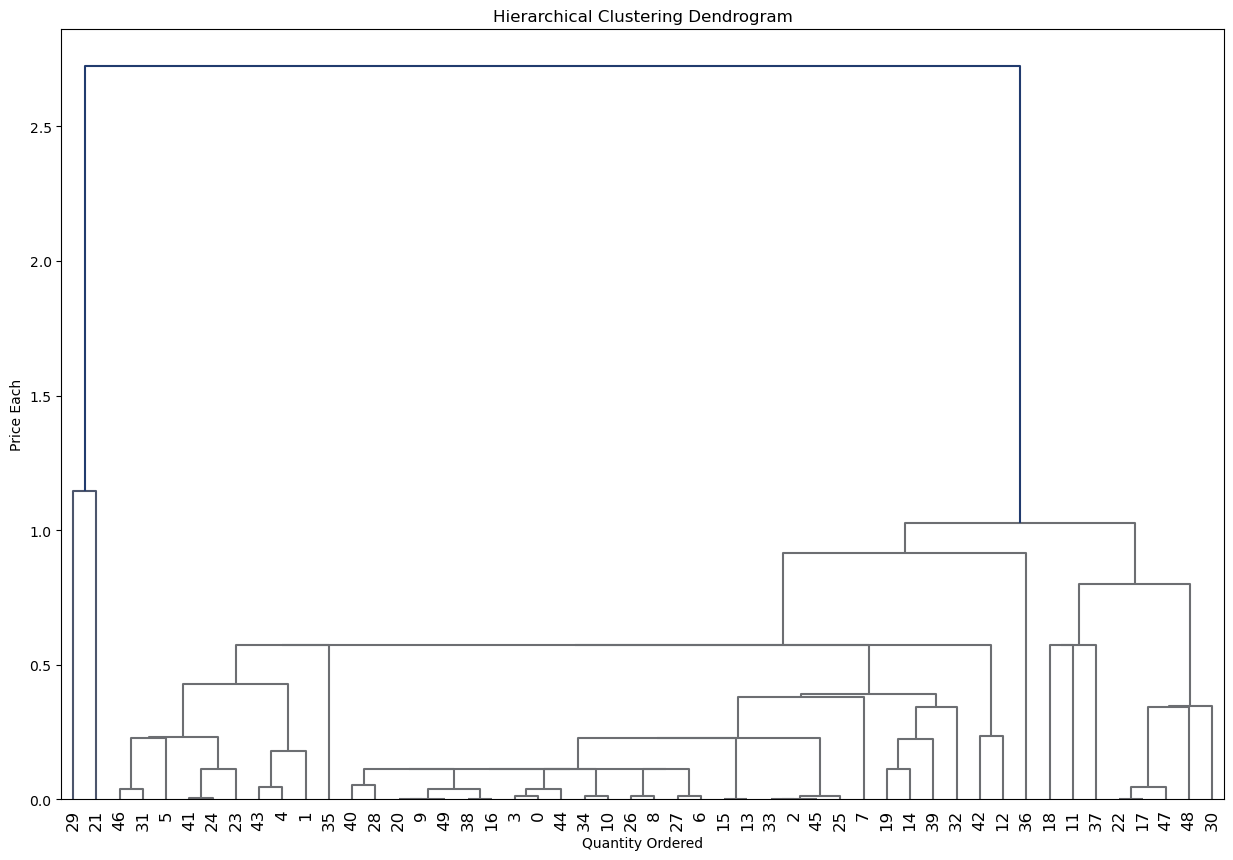

In [22]:
# Create DataFrame
df = pd.DataFrame(data, columns=['Price Each', 'Quantity Ordered'])

# Drop rows with NaN values
df.dropna(inplace=True)

# Take a sample
sample_size = 50  # Adjust the sample size as needed
sample_df = df.sample(n=sample_size, random_state=42)

# Check if there are any NaN values left in the sample
if sample_df.isnull().values.any():
    print("Sample still contains NaN values after dropping.")
else:
    # Standardize the data
    scaler = StandardScaler()
    sample_scaled = scaler.fit_transform(sample_df)

    # Hierarchical clustering
    linked = linkage(sample_scaled, method='single')

    # Plot the dendrogram
    plt.figure(figsize=(15, 10))
    dendrogram(linked, orientation='top', distance_sort='descending',  leaf_font_size=12, show_leaf_counts=True)
    plt.xlabel('Quantity Ordered')
    plt.ylabel('Price Each')
    plt.title('Hierarchical Clustering Dendrogram')
    plt.show()


In [23]:
# Fuzzy Logic Algorithm
print ( " the smallest quantity = ",data['Quantity Ordered'].min())
print ( " the smallest price = ",data['Price Each'].min())
print ("the biggest quantity = ",data['Quantity Ordered'].max())
print ("the largest price = ",data['Price Each'].max())

 the smallest quantity =  1
 the smallest price =  2.99
the biggest quantity =  180
the largest price =  1700.0


Product Evaluation: 37.7%


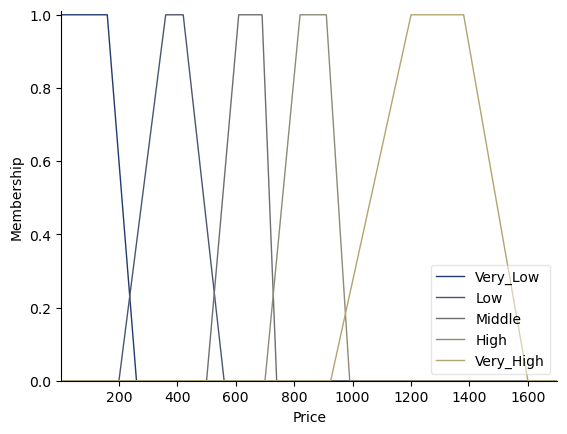

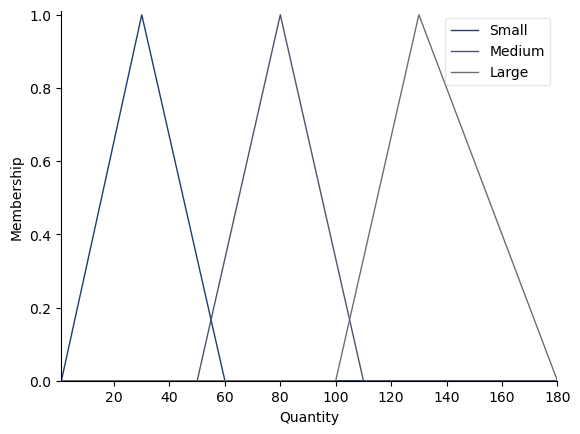

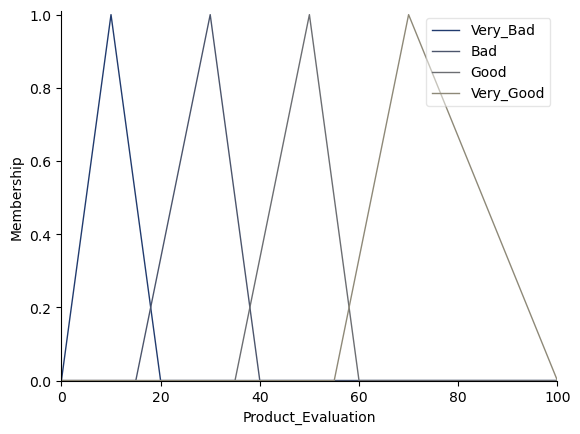

In [24]:
Price = ctrl.Antecedent(np.arange(2.99, 1701.0, 1), 'Price')
Quantity = ctrl.Antecedent(np.arange(1, 181, 1), 'Quantity')

Product_Evaluation = ctrl.Consequent(np.arange(0.0, 101.0, 1.0), 'Product_Evaluation')

Price['Very_Low'] = fuzz.trapmf(Price.universe, [2.99, 2.99, 160, 260])
Price['Low'] = fuzz.trapmf(Price.universe, [200.0, 360.0, 420.0, 560.0])
Price['Middle'] = fuzz.trapmf(Price.universe, [500.0, 610.0, 690.0, 740.0])
Price['High'] = fuzz.trapmf(Price.universe, [700.0, 820.0, 910.0, 990.0])
Price['Very_High'] = fuzz.trapmf(Price.universe, [925.0, 1200.0, 1380.0, 1600.0])

Quantity['Small'] = fuzz.trimf(Quantity.universe, [1.0, 30.0, 60.0])
Quantity['Medium'] = fuzz.trimf(Quantity.universe, [50.0, 80.0, 110.0])
Quantity['Large'] = fuzz.trimf(Quantity.universe, [100.0, 130.0, 180.0])

Product_Evaluation['Very_Bad'] = fuzz.trimf(Product_Evaluation.universe, [0.0, 10.0, 20.0])
Product_Evaluation['Bad'] = fuzz.trimf(Product_Evaluation.universe, [15.0, 30.0, 40.0])
Product_Evaluation['Good'] = fuzz.trimf(Product_Evaluation.universe, [35.0, 50.0, 60.0])
Product_Evaluation['Very_Good'] = fuzz.trimf(Product_Evaluation.universe, [55.0, 70.0, 100.0])


Price.view()
Quantity.view()
Product_Evaluation.view()
# Define rules
rule1 = ctrl.Rule(Price['Very_Low'] & Quantity['Small'], Product_Evaluation['Very_Bad'])
rule2 = ctrl.Rule(Price['Very_Low'] & Quantity['Medium'], Product_Evaluation['Bad'])
rule3 = ctrl.Rule(Price['Very_Low'] & Quantity['Large'], Product_Evaluation['Good'])

rule4 = ctrl.Rule(Price['Low'] & Quantity['Small'], Product_Evaluation['Very_Bad'])
rule5 = ctrl.Rule(Price['Low'] & Quantity['Medium'], Product_Evaluation['Good'])
rule6 = ctrl.Rule(Price['Low'] & Quantity['Large'], Product_Evaluation['Good'])

rule7 = ctrl.Rule(Price['Middle'] & Quantity['Small'], Product_Evaluation['Bad'])
rule8 = ctrl.Rule(Price['Middle'] & Quantity['Medium'], Product_Evaluation['Good'])
rule9 = ctrl.Rule(Price['Middle'] & Quantity['Large'], Product_Evaluation['Very_Good'])

rule10 = ctrl.Rule(Price['High'] & Quantity['Small'], Product_Evaluation['Bad'])
rule11 = ctrl.Rule(Price['High'] & Quantity['Medium'], Product_Evaluation['Very_Good'])
rule12 = ctrl.Rule(Price['High'] & Quantity['Large'], Product_Evaluation['Very_Good'])

rule13 = ctrl.Rule(Price['Very_High'] & Quantity['Small'], Product_Evaluation['Very_Bad'])
rule14 = ctrl.Rule(Price['Very_High'] & Quantity['Medium'], Product_Evaluation['Very_Good'])
rule15 = ctrl.Rule(Price['Very_High'] & Quantity['Large'], Product_Evaluation['Very_Good'])

# Create control system
product_evaluation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                               rule6, rule7, rule8, rule9, rule10,
                                               rule11, rule12, rule13, rule14, rule15])

product_evaluation = ctrl.ControlSystemSimulation(product_evaluation_ctrl)

# Input values
product_evaluation.input['Price'] = 210
product_evaluation.input['Quantity'] = 105

# Compute output
product_evaluation.compute()

# Output
#print("Product Evaluation:", product_evaluation.output['Product_Evaluation'])
print(f"Product Evaluation: {round(product_evaluation.output['Product_Evaluation'], 1)}%")

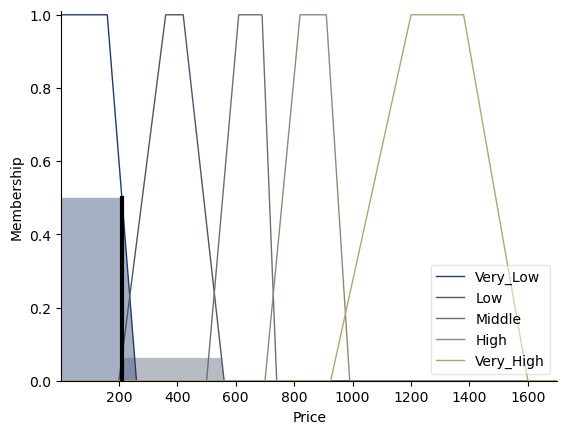

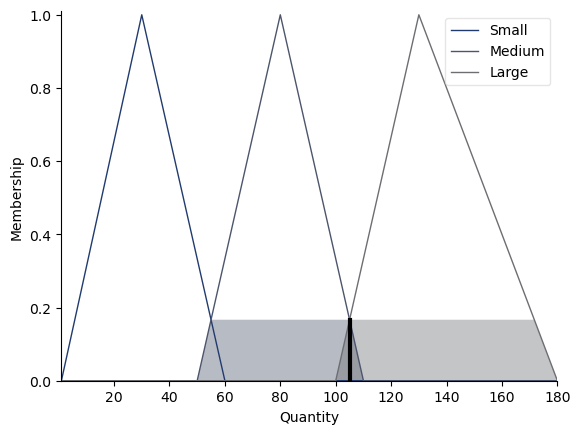

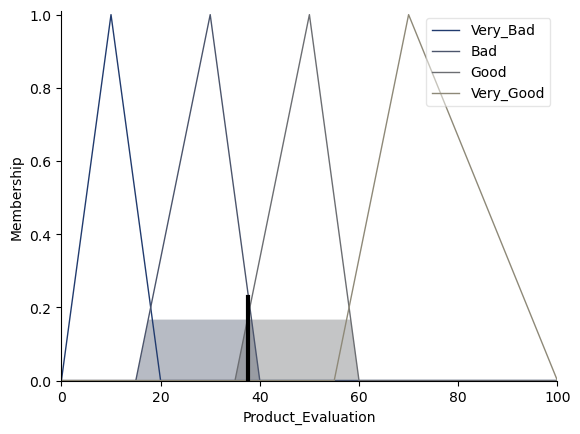

In [25]:
Price.view(product_evaluation)
Quantity.view(product_evaluation)
Product_Evaluation.view(product_evaluation)